# Дифференциальные уравнения в частных производных (уравнения математической физики)
## Решение волнового уравнения колебания струны

### Общая задача
Найти функцию $u(x,t)$ такую, что $\frac{\partial^2 u}{\partial t^2} = a^2 \frac{\partial^2 u}{\partial x^2},\ x \in [0, l],\ t \in [0, T]$, с начальными условиями $u(x,0)=f(x),\ \frac{\partial u(x,0)}{\partial t}=\Phi(x)$ и краевыми условиями $u(0,t)=\varphi(t),\ u(l,t)=\psi(t)$.

### Разностная схема аппроксимации дифференциального уравнения
Разбиваем отрезок $[0, l]$ на $n$ равных частей, получим одномерную сетку с узлами в точках $x_0=0,\ x_1=x_0+\Delta x,\ \cdots,\ x_j=x_0+j\Delta x,\ \cdots,\ x_n=x_0+n\Delta x = l$.
Аналогично отрезок $[0, T]$ разобьём на $m$ равных частей, получим одномерную сетку с узлами в точках $t_0=0,\ t_1=t_0+\Delta t,\ \cdots,\ t_k=t_0+k\Delta t,\ \cdots,\ t_m=t_0+m\Delta t = T$. Эти одномерные сетки совместно образуют двумерную сетку с $\Delta x = \frac{l}{n},\ \Delta t = \frac{T}{m}$.

Аппроксимируем первые производные по переменной $x$ центрально-разностной схемой.

*Для внутренних узлов:*

$\frac{\partial u}{\partial x} \Bigl|_{x=x_i} \approx \frac{u(x_{i+1})-u(x_{i+1})}{2\Delta x}$

*Для крайних узлов:*

$\frac{\partial u}{\partial x} \Bigl|_{x=x_0} \approx \frac{u(x_1)-u(x_0)}{\Delta x},\ \frac{\partial u}{\partial x} \Bigl|_{x=x_n} \approx \frac{u(x_n)-u(x_{n-1})}{\Delta x}$.

Аппроксимируем вторые производные по переменной $x$, используя аппроксимацию первых производных:

$\frac{\partial^2 u}{\partial x^2} \Bigl|_{x=x_i} \approx \frac{1}{2\Delta x} \Bigl(\frac{\partial u}{\partial x} \Bigl|_{x=x_{i+1}} - \frac{\partial u}{\partial x} \Bigl|_{x=x_{i-1}}\Bigr) = \frac{u(x_{i+1})-2u(x_i)+u(x_{i-1})}{(\Delta x)^2}$,

$\frac{\partial^2 u}{\partial x^2} \Bigl|_{x=x_i} \approx \frac{1}{\Delta x} \Bigl(\frac{\partial u}{\partial x} \Bigl|_{x=x_1} - \frac{\partial u}{\partial x} \Bigl|_{x=x_0}\Bigr) = \frac{1}{\Delta x} \Bigl( \frac{u(x_2)-u(x_0)}{2\Delta x} - \frac{u(x_1)-u(x_0)}{\Delta x} \Bigr) = \frac{u(x_2)-2u(x_1)+u(x_0)}{2(\Delta x)^2}$,

$\frac{\partial^2 u}{\partial x^2} \Bigl|_{x=x_n} \approx \frac{1}{\Delta x} \Bigl(\frac{\partial u}{\partial x} \Bigl|_{x=x_n} - \frac{\partial u}{\partial x} \Bigl|_{x=x_{n-1}}\Bigr) = \frac{u(x_n)-2u(x_{n-1})+u(x_{i-{n-2}})}{2(\Delta x)^2}$

Аналогично аппроксимируются прозводные по переменной $t$.

#### Явная схема
Введём обозначение $u^k_j := u(x_j,t_k)$ и запишем волновое уравнение, подставив аппроксимации в исходное уравнение, тем самым получим **явную схему**

$\frac{u^{k+1}_j-2u^k_j+u^{k-1}_j}{(\Delta t)^2} = a^2 \frac{u^k_{j+1}-2u^k_j+u^k_{j-1}}{(\Delta x)^2},\ j=\overline{0, n},\ k=\overline{0, m}$.

Здесь $u^k_0=\varphi(t_k),\ u^k_n=\psi(t_k),\ u^0_j=f(x_j),\ \Phi(x_j)=\frac{u^1_j-u^0_j}{\Delta t}$. Заметим, что $\Phi(x)$ аппроксимируется также разностной схемой.

**Явно** можно выразить значение функции $u$ в момент времени $k+1$, то есть $u^{k+1}_j$.

#### Неявная схема
Если рассматривать аппроксимацию $\frac{\partial^2 u}{\partial x^2}\Bigl|^{k+1}_j = \frac{u^{k+1}_{j+1}-2u^{k+1}_j+u^{k+1}_{j-1}}{(\Delta x)^2}$ и подставить её в исходное уравнение, получим **неявную схему**

$\frac{u^{k+1}_j-2u^k_j+u^{k-1}_j}{(\Delta t)^2} = a^2 \frac{u^{k+1}_{j+1}-2u^{k+1}_j+u^{k+1}_{j-1}}{(\Delta x)^2},\ j=\overline{0, n},\ k=\overline{0, m}$.

Из этого равенства явно не выражаются $u^{k+1}_{j-1},\ u^{k+1}_j,\ u^{k+1}_{j+1}$, поэтому для их нахождения необходимо решить систему линейных алгебраических уравнений

$\begin{equation}
    \left\{
        \begin{array}{cl}
            -2u^k_j + u^{k-1}_j-u^{k+1}_{j-1} = u^{k+1}_{j+1} - 3u^{k+1}_j, & j=1\\
            -2u^k_j + u^{k-1}_j = u^{k+1}_{j+1} - 3u^{k+1}_j + u^{k+1}_{j-1}, & j=\overline{2,98}\\
            -2u^k_j + u^{k-1}_j-u^{k+1}_{j+1} = u^{k+1}_j - 3u^{k+1}_{j-1}, & j=99\\
        \end{array}
    \right.
\end{equation}$.

В левых частях уравнений этой системы находятся известные. Это трёхдиагональная система, предпочтительным методом решения которой является метод прогонки. При решении системы заполняется определённая ранее сетка значений функции $u(x,t)$. Начальные и крайние узлы сетки заполняются в соответствии с начальными и краевыми условиями задачи. Данная схема использует *пятиточечный* шаблон.

### Задача 2.17
Найти функцию $u(x,t)$ такую, что $\frac{\partial^2 u}{\partial t^2} = \frac{\partial^2 u}{\partial x^2},\ x \in [0, 1],\ t \in [0, 4],\ \Delta x = 0.01,\ \Delta t = 0.01$,

с начальными условиями

$u(x,0)=f(x)=(x+0.5)^2,\\
\frac{\partial u(x,0)}{\partial t}=\Phi(x)=(x+1)sinx$

и краевыми условиями

$u(0,t)=\varphi(t)=0.5(0.5+t),\\
u(1,t)=\psi(t)=2.25$

##### Инициализация констант из условий задачи

In [1]:
import numpy as np

l = 1
T = 4
dx = 0.01
dt = 0.01

n = int((l - 0) / dx)  # номер последнего узла по пространству
m = int((T - 0) / dt)  # номер последнего узла по времени

##### Начальные условия

In [2]:
def f(x):
    return (x + 0.5) ** 2


def Phi(x):
    return (x + 1) * np.sin(x)

##### Краевые условия

In [3]:
def phi(t):
    return 0.5 * (0.5 + t)


def psi(t):
    return 2.25

Создаётся основная двумерная сетка на плоскости, где по строкам - временные слои, по столбцам - пространственные слои

In [4]:
u = np.zeros(shape=(m + 1, n + 1))

Заполняются первые два временных слоя (первые две строки сетки) для всех точек пространства (одномерного) с использованием *начальных условий*

In [5]:
for j in range(n + 1):
    u[0][j] = f(j * 0.01)
    u[1][j] = u[0][j] + Phi(j * 0.01) * 0.01

Заполняются крайние пространственные слои (самый левый и самый правый столбцы сетки) для всех моментов времени с использованием *краевых условий*

In [6]:
for k in range(m + 1):
    u[k][0] = phi(k * 0.01)
    u[k][-1] = psi(k * 0.01)

Основной цикл по временным слоям

In [7]:
for k in range(1, m):
    # вычисляется столбец свободных членов для решения системы
    # те самые "известные" слагаемые, которые были в СЛАУ слева от знака равно
    b = -2 * u[k] + u[k - 1] # внутренние узлы
    b = b[1:-1]
    # отдельно внешние узлы
    b[0] = -2 * u[k][1] + u[k - 1][1] - u[k + 1][0] 
    b[-1] = -2 * u[k][n - 1] + u[k - 1][n - 1] - u[k + 1][n]

    # заполняется трёхдиагональная матрица коэффициентов при неизвестных в системе
    # тут по главной диагонали значения -3, рядом с главной диагональю значения 1
    a = np.zeros(shape=(n - 1, n - 1))
    a[n - 2][n - 2] = -3
    for j in range(0, n - 2):
        a[j][j] = -3
        a[j + 1][j] = 1
        a[j][j + 1] = 1

    # решается система с помощью матричного уравнения
    # и вписывается в основную сетку на (k+1)-м временном слое
    # для внутренних узлов пространства
    # Крайние узлы были заполнены в соответствии с начальными условиями,
    # поэтому тут их заполнять не требуется
    u[k + 1][1:-1] = np.linalg.inv(a) @ b

##### Вывод в файл

In [8]:
with open('output_data/wave_equation_output.csv', 'w') as file:
    s = ''
    for j in range(m + 1):
        for k in range(n + 1):
            s += str(u[j][k])
            if k != n:
                s += '; '
        s += '\n'
    file.write(s)

##### Построение графика

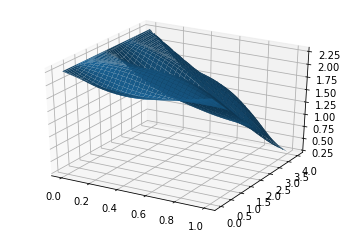

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

xgrid, tgrid = np.meshgrid([j * dx for j in range(n, -1, -1)], [k * dt for k in range(m, -1, -1)])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Axes3D.plot_surface(ax, X=xgrid, Y=tgrid, Z=u)
plt.show()